# Advertisement CTR optimisation

# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

 ## Upper Confidence Bound Algorithm
 
 ### Step 1
 At each round n, we consider two numbers for each ad i:
 
 N<sub>i</sub>(n) - the number of times the ad i was selected up to round n
 
 R<sub>i</sub>(n) - the sum of rewards of the ad i up to round n
    
 ### Step 2 
 From these two numbers we compute:
 
   The average reward of ad i upto round n 
   
   r_avg<sub>i</sub>(n) = R<sub>i</sub>(n) / N<sub>i</sub>(n)
   
   The confidence interval [ r_avg<sub>i</sub>(n) - &Delta;<sub>i</sub>(n) , r_avg<sub>i</sub>(n) + &Delta;<sub>i</sub>(n) ] at 
   round n with 
   
   &Delta;<sub>i</sub>(n) = &radic;3log(n) / 2 N<sub>i</sub>(n))
         
 ### Step 3
 We select the ad i that has the maximum UCB r_avg<sub>i</sub>(n) + &Delta;<sub>i</sub>(n)
 
 
 
 

## Implementing UCB

In [3]:
import math
N = 1000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

## Visualising the results

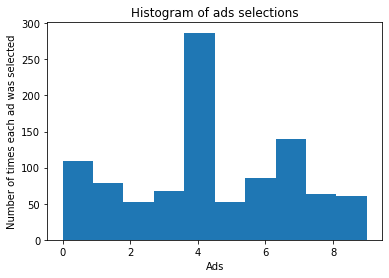

In [4]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

# Thompson Sampling

## Implementing Thompson Sampling

## Thompson Sampling Algorithm

### Step 1
 At each round n, we consider two numbers for each ad i:
 
 N<sub>i</sub><sup>1</sup>(n) - the number of times the ad i got reward 1 up to round n
 
 N<sub>i</sub><sup>0</sup>(n) - the number of times the ad i got reward 1 up to round n
 
 ### Step 2
 For each ad i, we take a random draw from the distribution below:
 
 &theta;<sub>i</sub>(n) = &beta;( N<sub>i</sub><sup>1</sup>(n) + 1 , N<sub>i</sub><sup>0</sup>(n) + 1 )
 
 ### Step 3 
 We select the ad that has the highest &theta;<sub>i</sub>(n)









In [5]:
import random
N = 500
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

## Visualising the results - Histogram

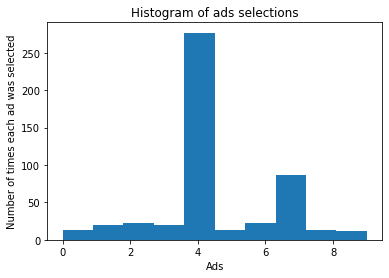

In [6]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

 <i>Our goal is to find the ad which has the highest conversion rate with minimum number of rounds or users since more the rounds more is the cost incurred to the advertisement company.</i>

<i> We can see that Upper Confidence Bound requires minimum 1000 rounds to detect ad 4 has the highest conversion rate but Thompson Sampling algorithm only takes 500 rounds to detect ad 4 has the highest conversion rate. So Thompson Sampling algorithm performs better than UCB algorithm.</i>